# Telemetria HAM VS VER nel giro del sorpasso

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Australia')    
race = ff1.get_session(2023, 'Astralia', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()

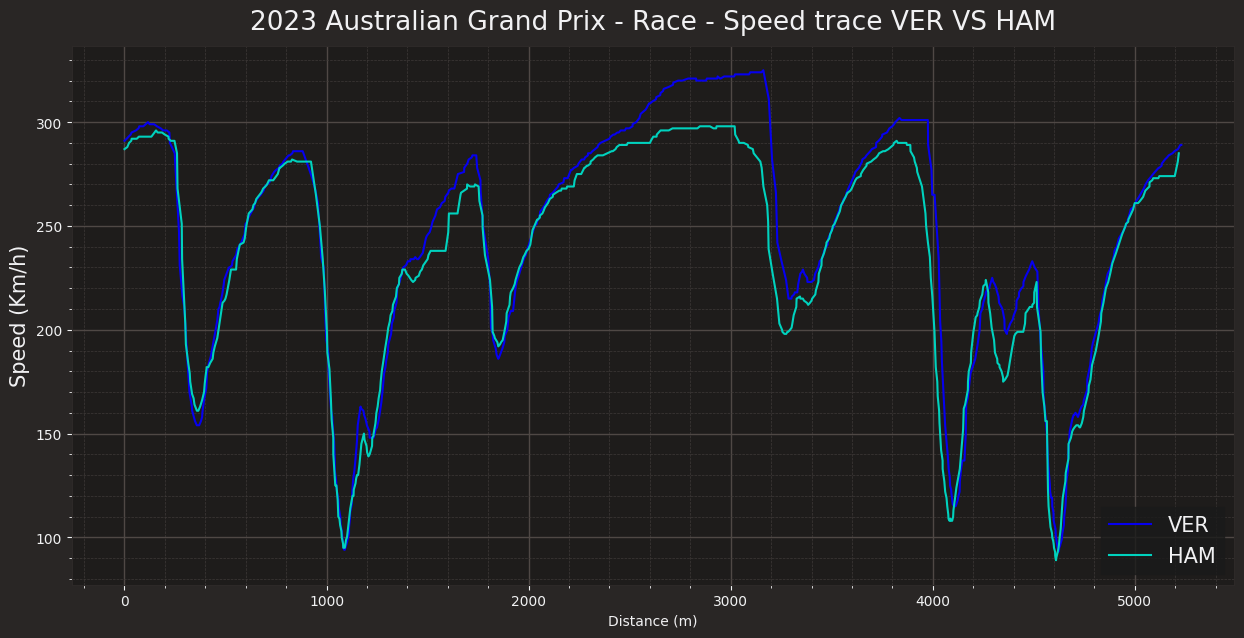

In [20]:
driver_1, driver_2 = 'VER', 'HAM'
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.loc[laps_driver_1['LapNumber']==12]
fastest_driver_2 = laps_driver_2.loc[laps_driver_2['LapNumber']==12]

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 7]
plot_title = f"{race.event.year} {race.event.EventName} - {race.name} - Speed trace {driver_1} VS {driver_2}"
plot_ratios = [1]

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size
ff1.plotting.setup_mpl()
# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Speed trace
ax.plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color("Red Bull"))
ax.plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color("Mercedes"))
ax.set_ylabel("Speed (Km/h)")
ax.legend(loc="lower right", prop={'size': 15})
ax.set_xlabel("Distance (m)")
ax.yaxis.label.set_size(15)
